In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json



In [2]:
def convert_bytes(size):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if size < 1024.0:
            return "%3.2f %s" % (size, x)
        size /= 1000.0

    return size

In [3]:
with open('./callback_unet_memory_full.json', 'r') as f:
    js = json.load(f)

In [4]:
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)

model : max : 380.51 MB | cur : 380.51 MB | 
input : max : 381.33 MB | cur : 381.33 MB | 
output : max : 392.80 MB | cur : 392.80 MB | 
forward : max : 1.07 GB | cur : 931.03 MB | 
loss : max : 1.07 GB | cur : 931.05 MB | 
backward : max : 1.13 GB | cur : 759.48 MB | 
step : max : 1.13 GB | cur : 759.48 MB | 


In [11]:
f_cur, f_max, b_cur, b_max, f_name, b_name = [], [], [], [], [], []
for fk, bk in zip(js['hookF'], js['hookB']):
    f_cur.append(fk['cur'][0])
    f_max.append(fk['max'][0])
    f_name.append(fk['name'])
    b_cur.append(bk['cur'][0])
    b_max.append(bk['max'][0])
    b_name.append(bk['name'])

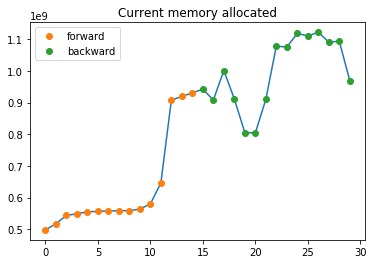

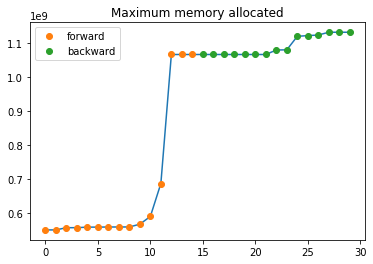

In [12]:
x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,f_max + list(reversed(b_max)))
plt.plot(x1,f_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

In [35]:
a = [f_cur[-1]]+list(reversed(b_cur))[:-1]
b = list(reversed(b_cur))
for i,j in zip(list(reversed(b_name)), np.array(b) - np.array(a)):
    txt = i.replace('[','').replace("'",'').replace(']','')
    s = ''.join([' ' for i in range(10-len(txt))])
    v = "-"+str(convert_bytes(abs(j))) if j<0 else "+"+str(convert_bytes(abs(j)))
    print(txt,s,v)


softmax     +11.47 MB
Conv3d      -34.41 MB
UnetUp3_CT  +93.39 MB
UnetUp3_CT  -89.73 MB
UnetUp3_CT  -106.30 MB
UnetUp3_CT  -1.41 MB
UnetConv3   +106.08 MB
MaxPool3d   +168.44 MB
UnetConv3   -2.76 MB
MaxPool3d   +43.00 MB
UnetConv3   -7.78 MB
MaxPool3d   +11.54 MB
UnetConv3   -31.13 MB
MaxPool3d   +2.66 MB
UnetConv3   -124.52 MB


In [45]:
print(convert_bytes(64*80*80*32*4*2 - 14*80*80*32*4))

93.39 MB


In [14]:
print(64*80*80*32*4)
print(128*40*40*16*4)
print(64*20*20*8*4)

52428800
13107200
819200


In [15]:
f_name

["['UnetConv3']",
 "['MaxPool3d']",
 "['UnetConv3']",
 "['MaxPool3d']",
 "['UnetConv3']",
 "['MaxPool3d']",
 "['UnetConv3']",
 "['MaxPool3d']",
 "['UnetConv3']",
 "['UnetUp3_CT']",
 "['UnetUp3_CT']",
 "['UnetUp3_CT']",
 "['UnetUp3_CT']",
 "['Conv3d']",
 "['softmax']"]

model : max : 380.51 MB | cur : 380.51 MB | 
input : max : 387.07 MB | cur : 387.07 MB | 
output : max : 479.34 MB | cur : 479.34 MB | 
forward : max : 5.85 GB | cur : 4.78 GB | 
loss : max : 5.85 GB | cur : 4.78 GB | 
backward : max : 5.85 GB | cur : 758.10 MB | 
step : max : 5.85 GB | cur : 758.10 MB | 


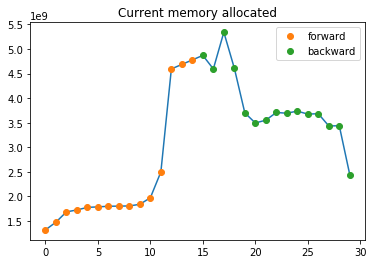

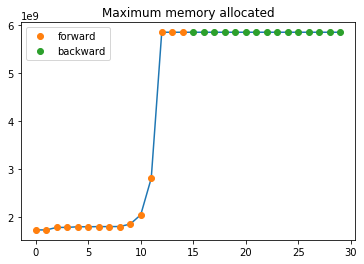

softmax     +91.75 MB
Conv3d      -275.77 MB
UnetUp3_CT  +747.11 MB
UnetUp3_CT  -731.92 MB
UnetUp3_CT  -909.38 MB
UnetUp3_CT  -205.26 MB
UnetConv3   +56.43 MB
MaxPool3d   +156.97 MB
UnetConv3   -15.04 MB
MaxPool3d   +43.00 MB
UnetConv3   -61.21 MB
MaxPool3d   +8.52 MB
UnetConv3   -249.04 MB
MaxPool3d   +3.44 MB
UnetConv3   -996.15 MB


In [46]:
with open('./callback_unet_memory_160_full.json', 'r') as f:
    js = json.load(f)
    
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)
    
f_cur, f_max, b_cur, b_max, f_name, b_name = [], [], [], [], [], []
for fk, bk in zip(js['hookF'], js['hookB']):
    f_cur.append(fk['cur'][0])
    f_max.append(fk['max'][0])
    f_name.append(fk['name'])
    b_cur.append(bk['cur'][0])
    b_max.append(bk['max'][0])
    b_name.append(bk['name'])

x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,f_max + list(reversed(b_max)))
plt.plot(x1,f_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()


a = [f_cur[-1]]+list(reversed(b_cur))[:-1]
b = list(reversed(b_cur))
for i,j in zip(list(reversed(b_name)), np.array(b) - np.array(a)):
    txt = i.replace('[','').replace("'",'').replace(']','')
    s = ''.join([' ' for i in range(10-len(txt))])
    v = "-"+str(convert_bytes(abs(j))) if j<0 else "+"+str(convert_bytes(abs(j)))
    print(txt,s,v)

In [47]:
print(convert_bytes(64*160*160*64*4*2 - 14*160*160*64*4))

747.11 MB


model : max : 380.51 MB | cur : 380.51 MB | 
input : max : 382.92 MB | cur : 382.92 MB | 
output : max : 416.64 MB | cur : 416.64 MB | 
forward : max : 2.40 GB | cur : 2.00 GB | 
loss : max : 2.40 GB | cur : 2.00 GB | 
backward : max : 2.40 GB | cur : 759.74 MB | 
step : max : 2.40 GB | cur : 759.74 MB | 


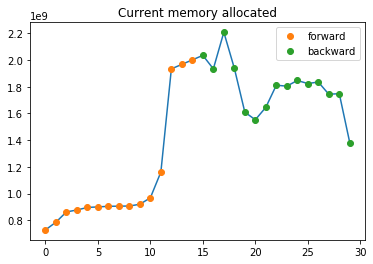

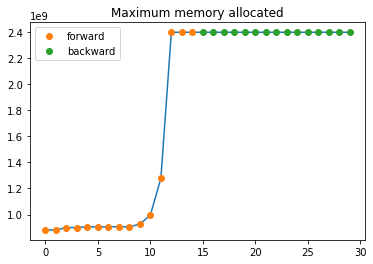

softmax     +33.72 MB
Conv3d      -101.15 MB
UnetUp3_CT  +274.57 MB
UnetUp3_CT  -269.70 MB
UnetUp3_CT  -329.51 MB
UnetUp3_CT  -56.97 MB
UnetConv3   +93.22 MB
MaxPool3d   +165.66 MB
UnetConv3   -6.77 MB
MaxPool3d   +42.36 MB
UnetConv3   -22.88 MB
MaxPool3d   +11.27 MB
UnetConv3   -91.52 MB
MaxPool3d   +4.29 MB
UnetConv3   -368.18 MB


In [49]:
with open('./callback_unet_memory_112_full.json', 'r') as f:
    js = json.load(f)
    
for i in list(js.keys())[:-2]:
    txt = i +' : '
    for k in list(js[i]):
        txt += k + ' : ' + convert_bytes(js[i][k]) + ' | '
    print(txt)
    
f_cur, f_max, b_cur, b_max, f_name, b_name = [], [], [], [], [], []
for fk, bk in zip(js['hookF'], js['hookB']):
    f_cur.append(fk['cur'][0])
    f_max.append(fk['max'][0])
    f_name.append(fk['name'])
    b_cur.append(bk['cur'][0])
    b_max.append(bk['max'][0])
    b_name.append(bk['name'])

x1, x2 = list(range(len(f_cur))), list(range(len(f_cur),len(f_cur)+len(b_cur)))
plt.plot(x1+x2,f_cur + list(reversed(b_cur)))
plt.plot(x1,f_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,f_max + list(reversed(b_max)))
plt.plot(x1,f_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(b_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

a = [f_cur[-1]]+list(reversed(b_cur))[:-1]
b = list(reversed(b_cur))
for i,j in zip(list(reversed(b_name)), np.array(b) - np.array(a)):
    txt = i.replace('[','').replace("'",'').replace(']','')
    s = ''.join([' ' for i in range(10-len(txt))])
    v = "-"+str(convert_bytes(abs(j))) if j<0 else "+"+str(convert_bytes(abs(j)))
    print(txt,s,v)

In [48]:
print(convert_bytes(64*112*112*48*4*2 - 14*112*112*48*4))

274.56 MB


In [52]:
print(convert_bytes(64*112*112*48*4))

462.42 MB


# RevUNet

In [8]:
with open('./callback_revunet_memory_80_full.json', 'r') as f:
    revjs = json.load(f)
    
    
for i in list(revjs.keys())[:-2]:
    txt = i +' : '
    for k in list(revjs[i]):
        txt += k + ' : ' + convert_bytes(revjs[i][k]) + ' | '
    print(txt)

model : max : 160.67 MB | cur : 160.67 MB | 
input : max : 161.49 MB | cur : 161.49 MB | 
output : max : 172.96 MB | cur : 172.96 MB | 
forward : max : 445.70 MB | cur : 361.68 MB | 
loss : max : 445.70 MB | cur : 361.71 MB | 
backward : max : 665.65 MB | cur : 317.87 MB | 
step : max : 665.65 MB | cur : 317.87 MB | 


In [9]:
revjs['hookF']

[{'max': [229084160], 'cur': [225389056], 'name': "['Conv3d']"},
 {'max': [256347136, 623093248],
  'cur': [252652032, 505219072],
  'name': "['Conv3d', 'Conv3d']"},
 {'max': [307177984, 623093248],
  'cur': [279915008, 450581504],
  'name': "['Conv3d', 'Conv3d']"},
 {'max': [334440960], 'cur': [245049856], 'name': "['MaxPool3d']"},
 {'max': [334440960], 'cur': [259205632], 'name': "['Conv3d']"},
 {'max': [334440960, 623093248],
  'cur': [265759232, 489426432],
  'name': "['Conv3d', 'Conv3d']"},
 {'max': [334440960, 623093248],
  'cur': [272312832, 474827264],
  'name': "['Conv3d', 'Conv3d']"},
 {'max': [334440960], 'cur': [263072256], 'name': "['MaxPool3d']"},
 {'max': [334440960], 'cur': [266349056], 'name': "['Conv3d']"},
 {'max': [334440960, 623093248],
  'cur': [269036032, 484655616],
  'name': "['Conv3d', 'Conv3d']"},
 {'max': [334440960, 623093248],
  'cur': [269625856, 479608320],
  'name': "['Conv3d', 'Conv3d']"},
 {'max': [334440960], 'cur': [267577856], 'name': "['MaxPool3d'

In [10]:
revjs['hookB']

[{'max': [665652224], 'cur': [371120128], 'name': "['Conv3d']"},
 {'max': [665652224], 'cur': [557759488], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [505219072], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [495408128], 'name': "['MaxPool3d']"},
 {'max': [623093248], 'cur': [456053760], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [502977024], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [489426432], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [487344640], 'name': "['MaxPool3d']"},
 {'max': [623093248], 'cur': [477383168], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [489702912], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [484655616], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [481623552], 'name': "['MaxPool3d']"},
 {'max': [623093248], 'cur': [478641664], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [481506816], 'name': "['Conv3d']"},
 {'max': [623093248], 'cur': [473607680], 'name': "['Conv3d']"},
 {'max': [623093

In [11]:
frev_cur, frev_max, brev_cur, brev_max = [], [], [], []
for fk, bk in zip(revjs['hookF'], revjs['hookB']):
    frev_cur.append(fk['cur'][0])
    frev_max.append(fk['max'][0])
    brev_cur.append(bk['cur'][0])
    brev_max.append(bk['max'][0])

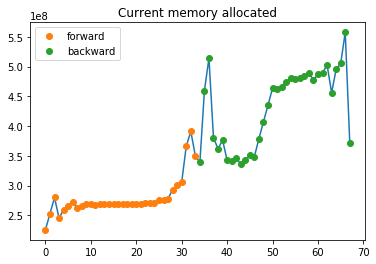

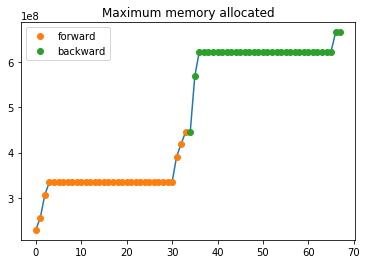

In [12]:
x1, x2 = list(range(len(frev_cur))), list(range(len(frev_cur),len(frev_cur)+len(brev_cur)))
plt.plot(x1+x2,frev_cur + list(reversed(brev_cur)))
plt.plot(x1,frev_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,frev_max + list(reversed(brev_max)))
plt.plot(x1,frev_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()

model : max : 160.67 MB | cur : 160.67 MB | 
input : max : 163.08 MB | cur : 163.08 MB | 
output : max : 196.80 MB | cur : 196.80 MB | 
forward : max : 997.41 MB | cur : 754.47 MB | 
loss : max : 997.41 MB | cur : 754.49 MB | 
backward : max : 1.51 GB | cur : 318.45 MB | 
step : max : 1.51 GB | cur : 318.45 MB | 


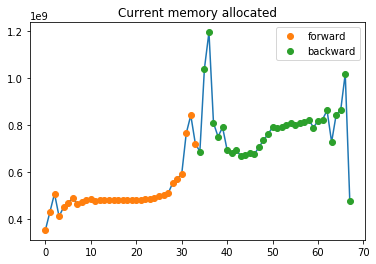

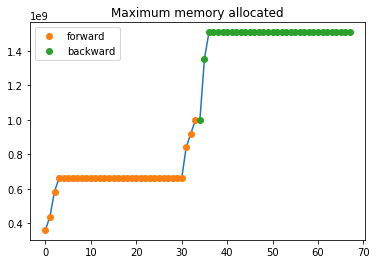

In [14]:
with open('./callback_revunet_memory_112_full.json', 'r') as f:
    revjs = json.load(f)
    
    
for i in list(revjs.keys())[:-2]:
    txt = i +' : '
    for k in list(revjs[i]):
        txt += k + ' : ' + convert_bytes(revjs[i][k]) + ' | '
    print(txt)
    
    
frev_cur, frev_max, brev_cur, brev_max = [], [], [], []
for fk, bk in zip(revjs['hookF'], revjs['hookB']):
    frev_cur.append(fk['cur'][0])
    frev_max.append(fk['max'][0])
    brev_cur.append(bk['cur'][0])
    brev_max.append(bk['max'][0])
    

x1, x2 = list(range(len(frev_cur))), list(range(len(frev_cur),len(frev_cur)+len(brev_cur)))
plt.plot(x1+x2,frev_cur + list(reversed(brev_cur)))
plt.plot(x1,frev_cur, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_cur)), 'o', label = 'backward')
plt.legend()
plt.title('Current memory allocated')
plt.show()


plt.plot(x1+x2,frev_max + list(reversed(brev_max)))
plt.plot(x1,frev_max, 'o', label = 'forward')
plt.plot(x2,list(reversed(brev_max)), 'o', label = 'backward')
plt.legend()
plt.title('Maximum memory allocated')
plt.show()